In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug

params = {'text.usetex': False,
          'mathtext.fontset': 'stix'}
#           'axes.titlesize': 9,
#           'xtick.labelsize': 7,
#           'ytick.labelsize': 7}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
rk3 = slug.load_data2d('pub_shu45_weno5_rk3_1024_10001.slug')
sf3 = slug.load_data2d('pub_shu45_weno5_sf3_1024_10001.slug')

rk4 = slug.load_data2d('pub_shu45_weno5_rk4_1024_10001.slug')
sf4 = slug.load_data2d('pub_shu45_weno5_sf4_1024_10001.slug')


rt2 = np.sqrt(2.)

ref = slug.load_data1d('ref.slug')
# ref = slug.load_data2d('shu45_weno5_rk4_4096_10001.slug')

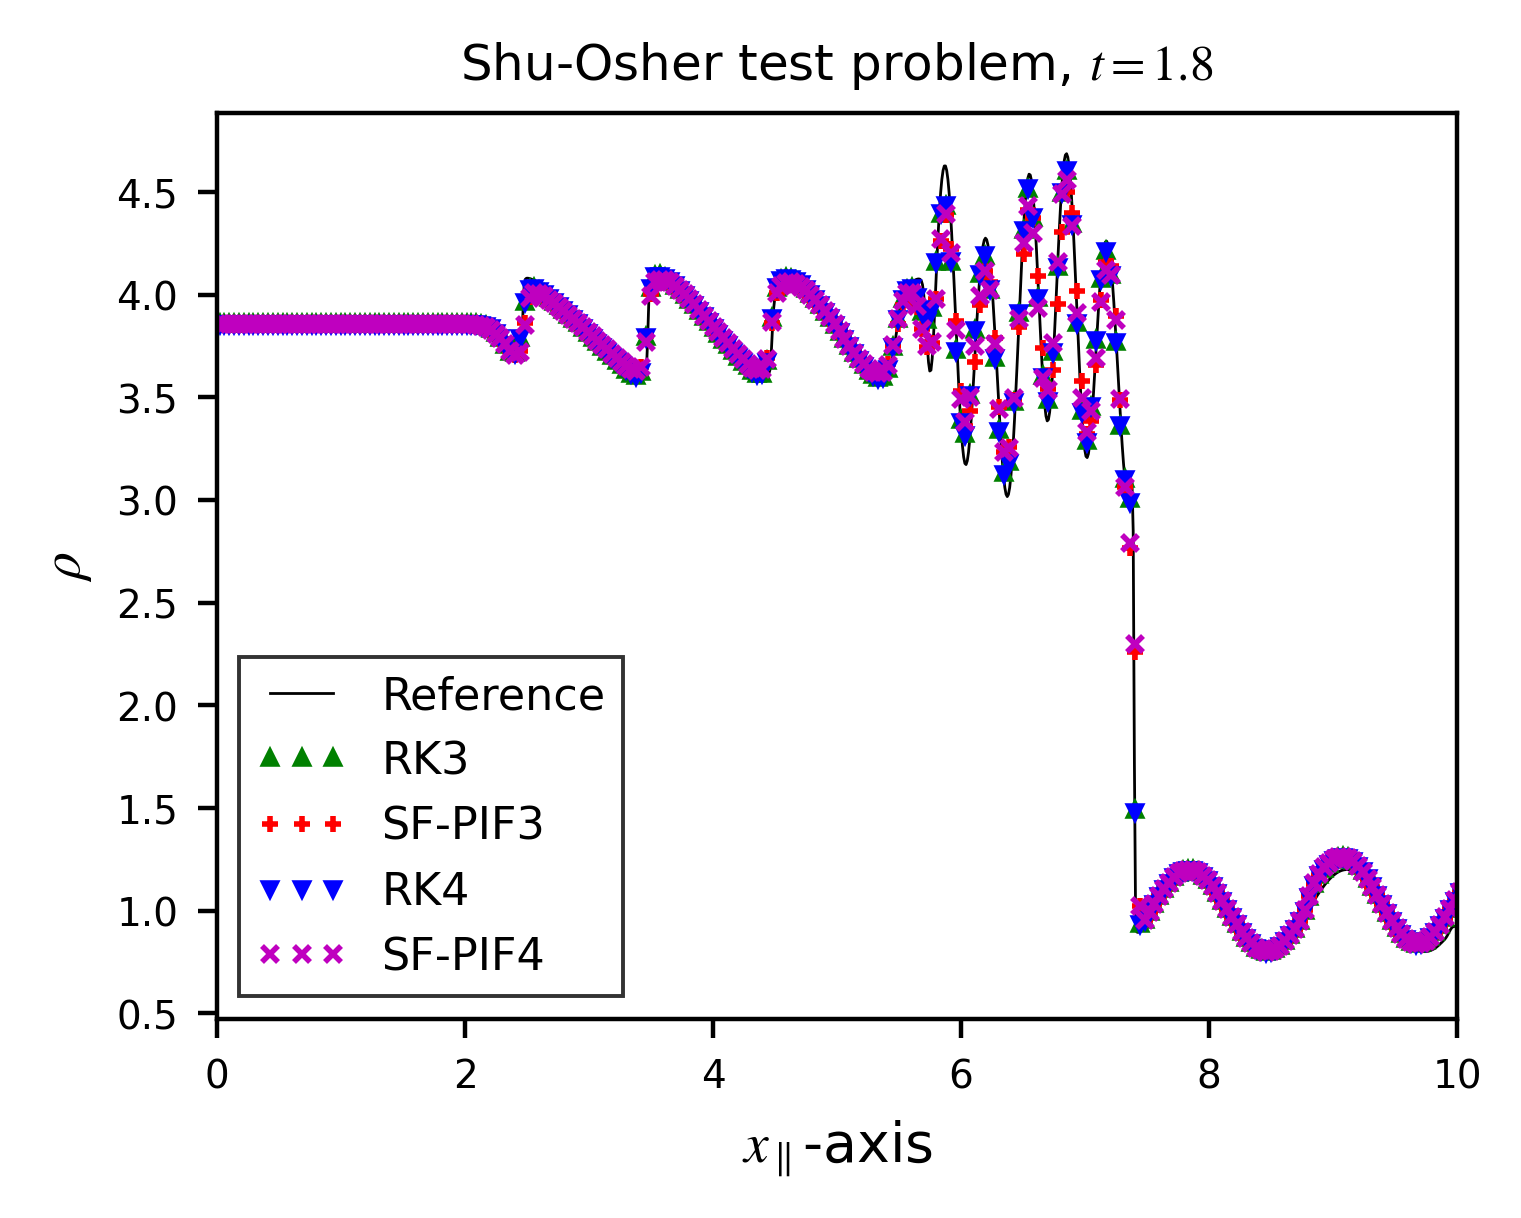

In [3]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

ax.plot(ref.x, ref.dens, 'k-', markersize=3, linewidth=0.5, label = 'Reference')

ax.plot(rt2*rk3.x, rk3.dens.diagonal(), 'g^', markersize=2, linewidth=0.5, label = 'RK3')
ax.plot(rt2*sf3.x, sf3.dens.diagonal(), 'r+', markersize=3, linewidth=0.5, label = 'SF-PIF3')


ax.plot(rt2*rk4.x, rk4.dens.diagonal(), 'bv', markersize=2, linewidth=0.5, label = 'RK4')
ax.plot(rt2*sf4.x, sf4.dens.diagonal(), 'mx', markersize=3, linewidth=0.5, label = 'SF-PIF4')



ax.set_xlim((0, 10))

legend = ax.legend(fontsize=8, numpoints=3, fancybox=False, edgecolor='k', loc='lower left')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='major', labelsize=7)
ax.set_title('Shu-Osher test problem, ' + r'$t = 1.8$', fontsize=9)

ax.set_xlabel(r'$x_{\parallel}$-axis')
ax.set_ylabel(r'$\rho$')

fig.savefig('shu45_weno5_256.pdf', bbox_inches='tight', pad_inches=0)


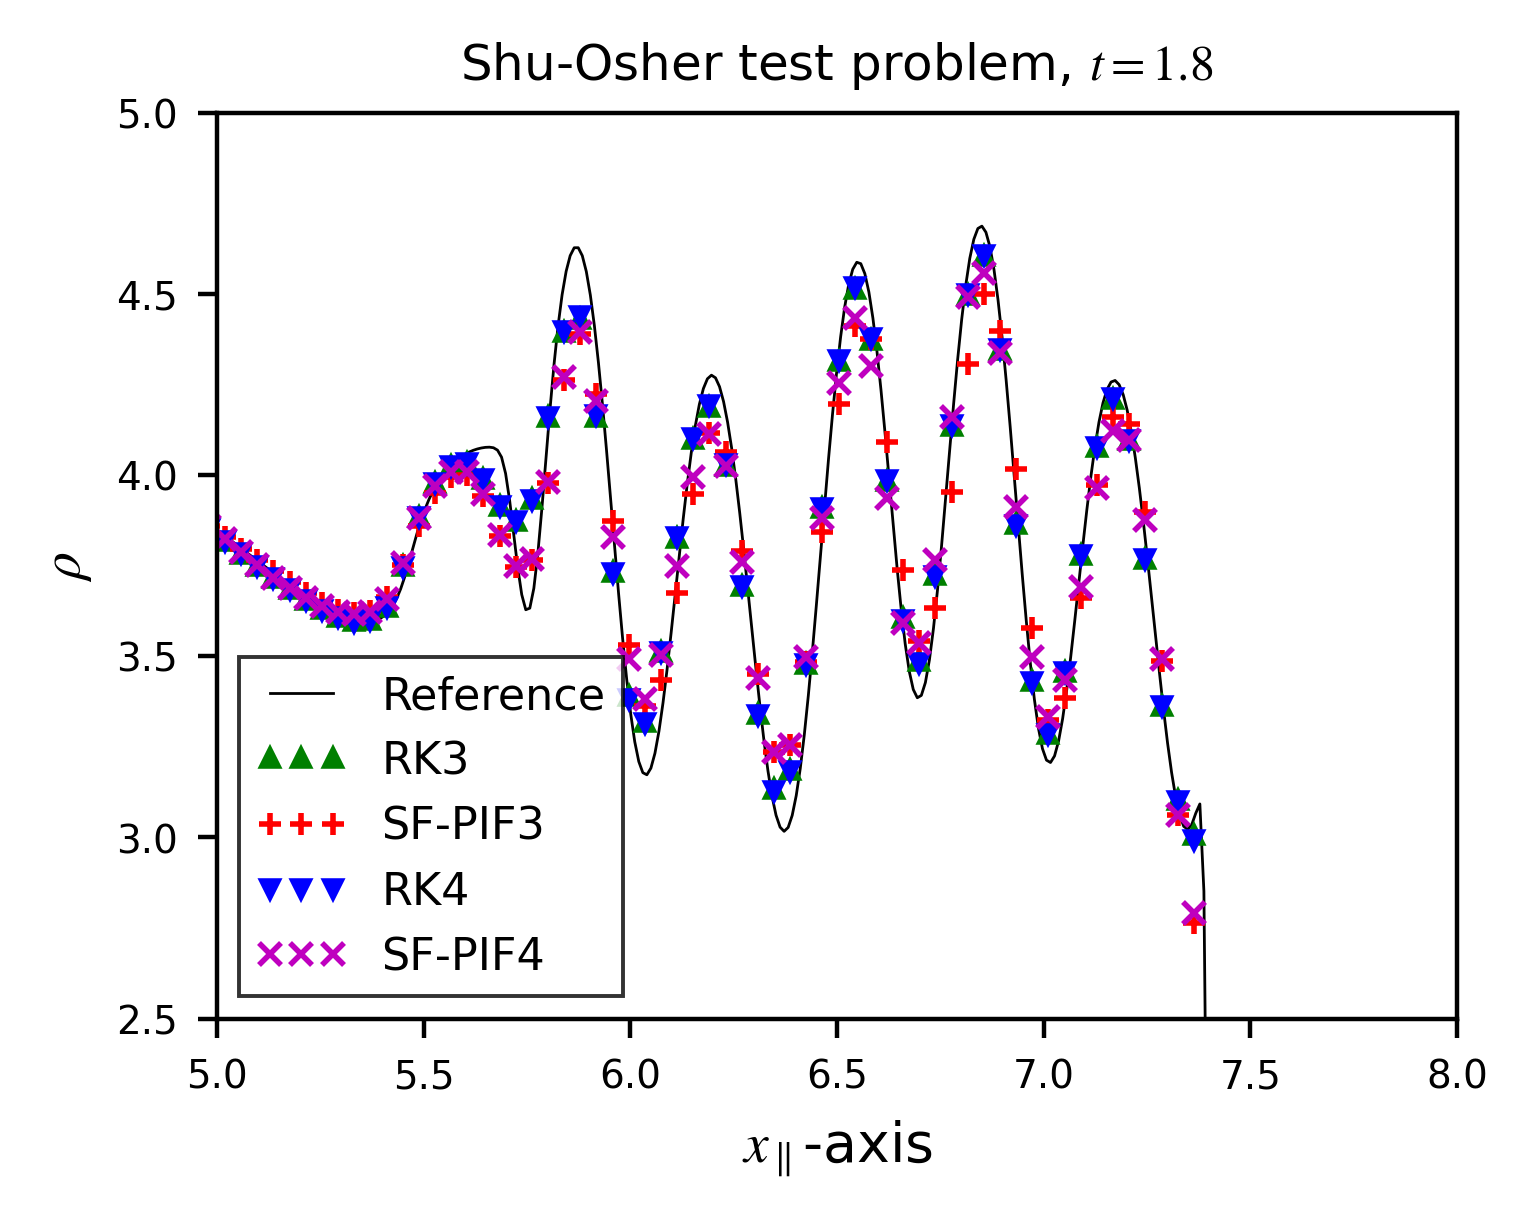

In [4]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

ax.plot(ref.x, ref.dens, 'k-', markersize=3, linewidth=0.5, label = 'Reference')

ax.plot(rt2*rk3.x, rk3.dens.diagonal(), 'g^', markersize=3, linewidth=0.5, label = 'RK3')
ax.plot(rt2*sf3.x, sf3.dens.diagonal(), 'r+', markersize=4, linewidth=0.5, label = 'SF-PIF3')

ax.plot(rt2*rk4.x, rk4.dens.diagonal(), 'bv', markersize=3, linewidth=0.5, label = 'RK4')
ax.plot(rt2*sf4.x, sf4.dens.diagonal(), 'mx', markersize=4, linewidth=0.5, label = 'SF-PIF4')



ax.set_xlim((5, 8))
ax.set_ylim((2.5, 5))

legend = ax.legend(fontsize=8, numpoints=3, fancybox=False, edgecolor='k', loc='lower left')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='major', labelsize=7)
ax.set_title('Shu-Osher test problem, ' + r'$t = 1.8$', fontsize=9)

ax.set_xlabel(r'$x_{\parallel}$-axis')
ax.set_ylabel(r'$\rho$')

fig.savefig('shu45_weno5_256_zoomed.pdf', bbox_inches='tight', pad_inches=0)

In [5]:
def plot_cmap(ax, data, draw_cb=True, **kwargs):

    # plot dens
    var = 'dens'

    # get variable data
    var_data = slug.get_data(data, var)

    # get edge grid
    xi, yi = data.edge_grid()

    # cmap plot
    im = ax.pcolormesh(xi, yi, var_data, vmin=0.1, vmax=1.8, **kwargs)
    if(draw_cb):
        cb = slug.add_colorbar(im)
        cb.ax.tick_params(labelsize=7)

    ax.set_aspect(aspect=1)
    
    xx = np.linspace(0, 20*np.sqrt(2), 5)
    ax.plot(xx, xx, 'k-D', markersize=3)

    ax.tick_params(axis='both', which='major', labelsize=7)


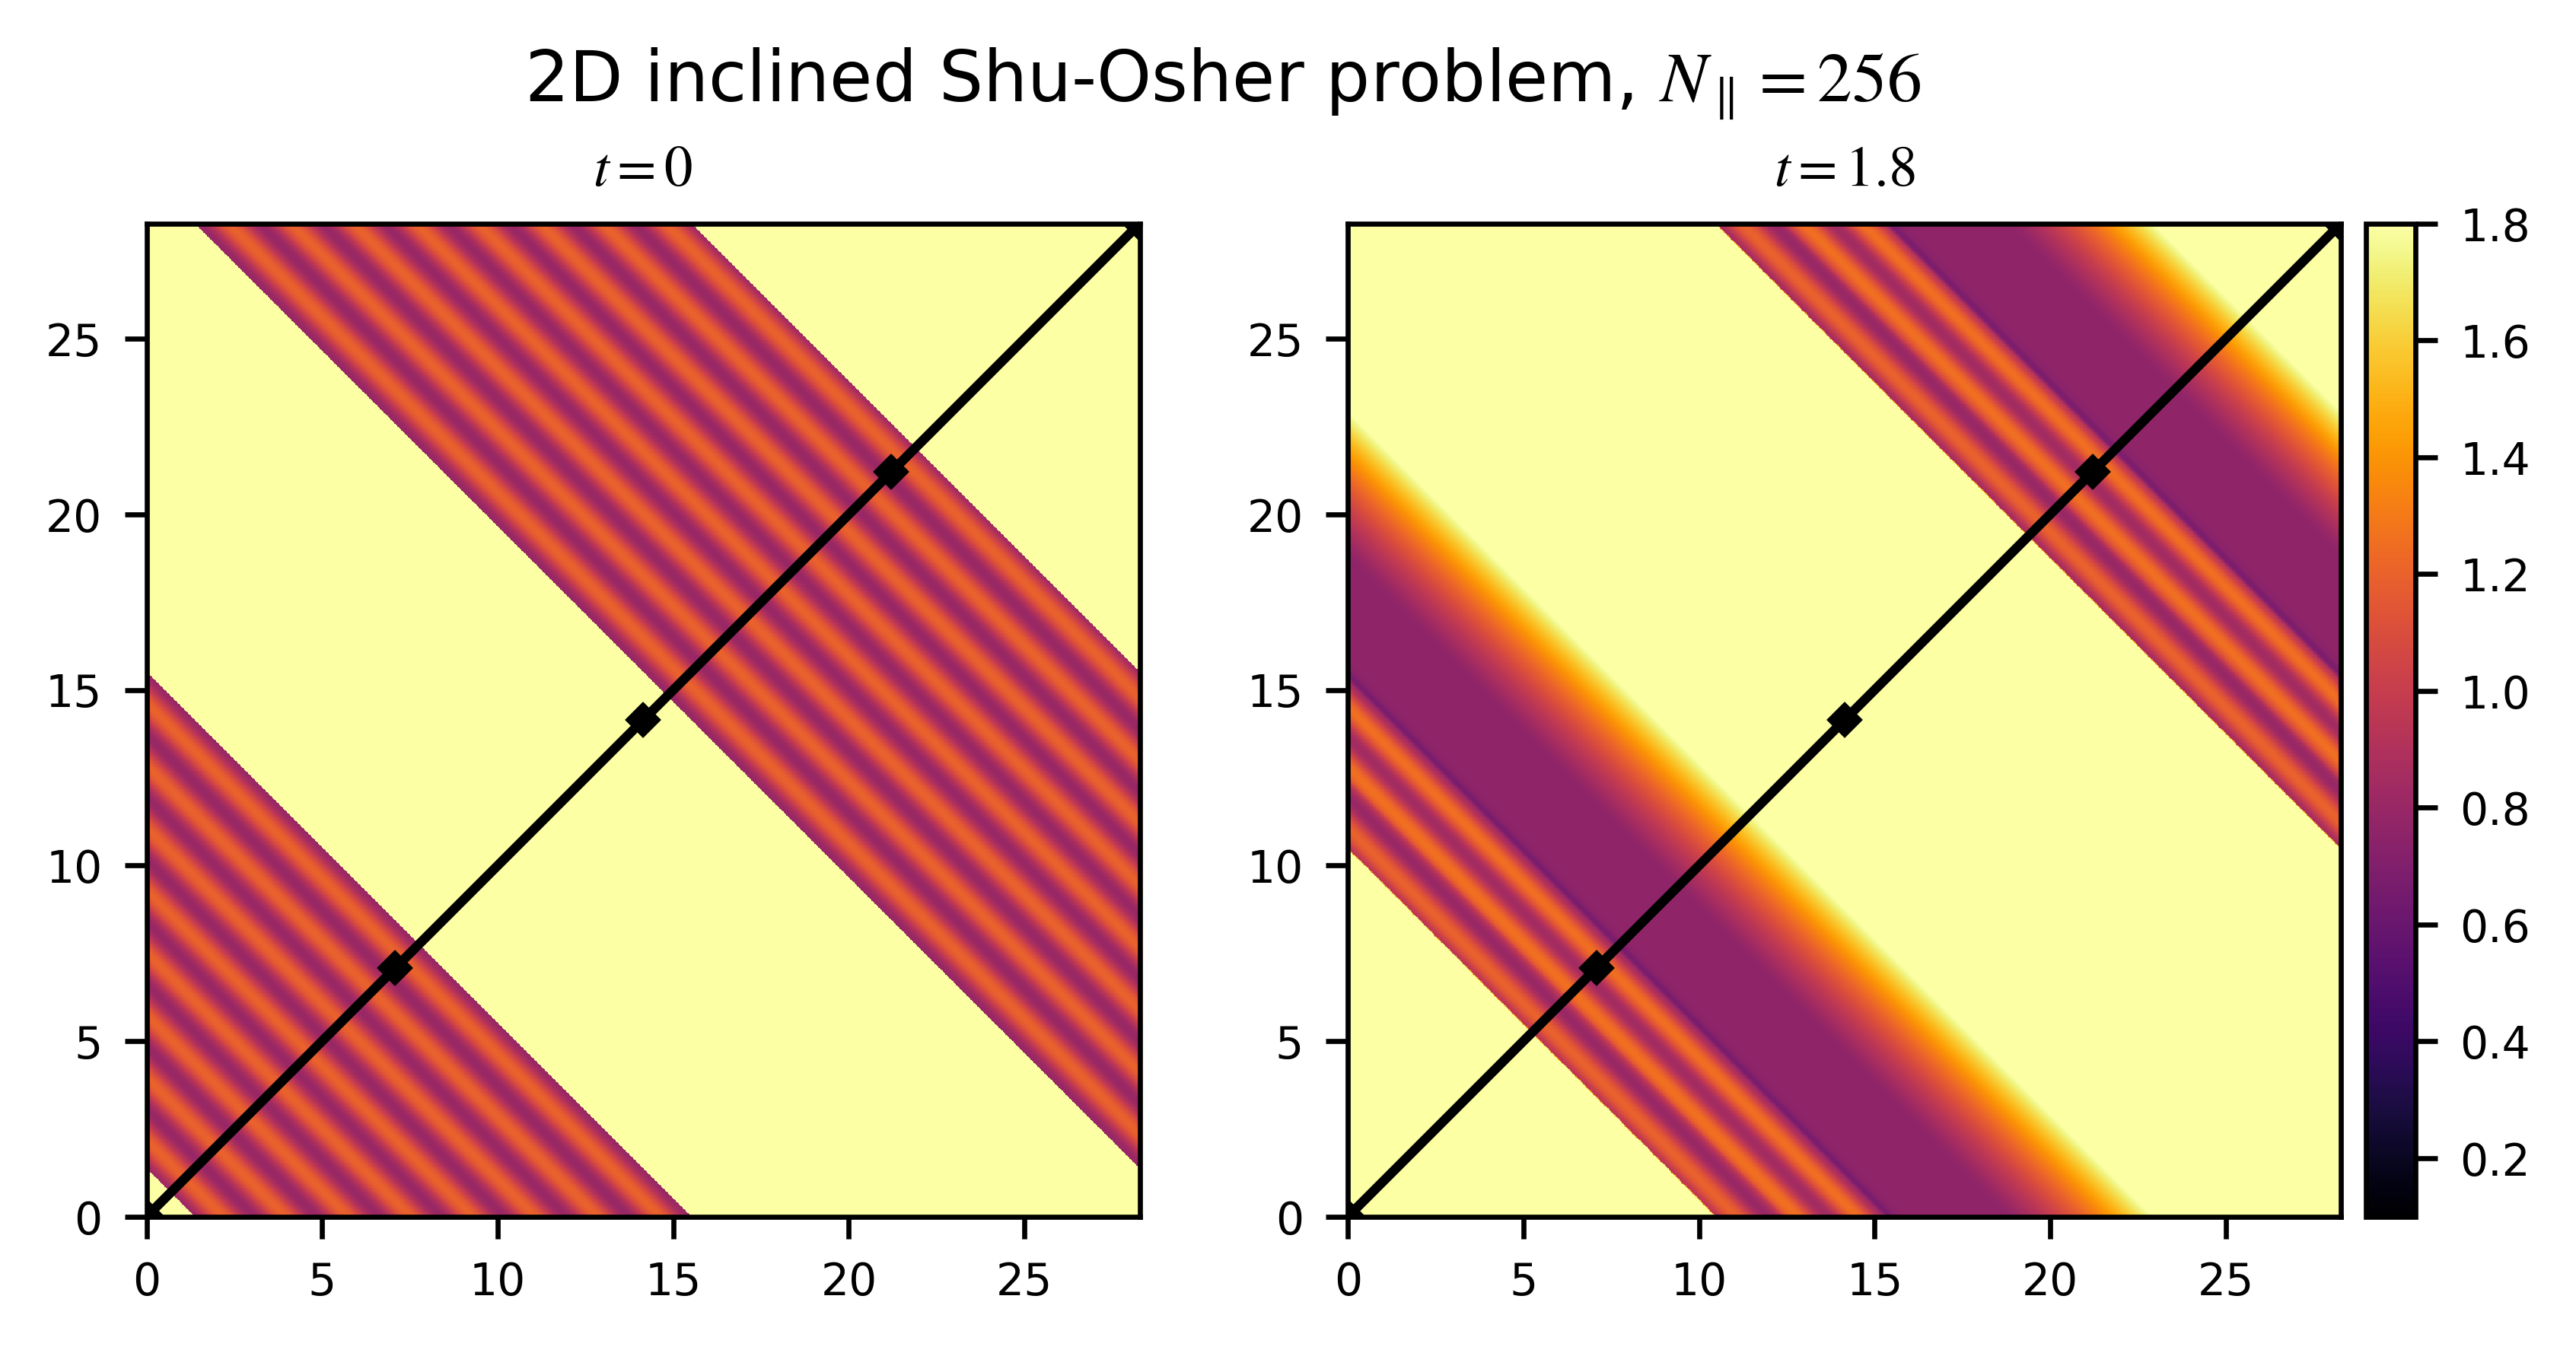

In [6]:
shu2d_0 = slug.load_data2d('./shu45_10000.slug')
shu2d_1 = slug.load_data2d('./pub_shu45_weno5_sf4_1024_10001.slug')


fig = plt.figure(figsize=(7,3), dpi=600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plot_cmap(ax1, shu2d_0, draw_cb=False, cmap='inferno')
plot_cmap(ax2, shu2d_1, cmap='inferno')
ax1.set_title('$t=0$', fontsize=9)
ax2.set_title('$t=1.8$', fontsize=9)

fig.subplots_adjust(hspace=0., wspace=0., top=0.85)

fig.suptitle('2D inclined Shu-Osher problem, $N_{\parallel} = 256$', fontsize=11)


fig.savefig('./shu45_2d_snapshot.png', bbox_inches='tight', pad_inches=0)